In [43]:
# -*- coding: utf-8 -*-
from __future__ import unicode_literals
# text in Western (Windows 1252)

import pickle
import numpy as np
# import StringIO
import math
from keras import optimizers, metrics
from keras.models import Model
from keras.layers import Dense, Dropout, Input
from keras.layers.merge import concatenate
from keras import regularizers
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from keras.constraints import maxnorm
from keras.layers import Flatten
from keras.optimizers import SGD
from keras.models import load_model
# from keras import backend as Input
np.random.seed(7)

In [44]:
# %run ../../../prepare_data.py

import sys
sys.path.insert(0, '../../../')
from prepare_data import *

In [45]:
# X_train, X_other_features_train, y_train, X_validate, X_other_features_validate, y_validate = generate_full_matrix_inputs()
# save_inputs('../../internal_representations/inputs/shuffeled_matrix_train_inputs_other_features_multilabel.h5', X_train, y_train, other_features = X_other_features_train)
# save_inputs('../../internal_representations/inputs/shuffeled_matrix_validate_inputs_other_features_multilabel.h5', X_validate, y_validate,  other_features = X_other_features_validate)
X_train, X_other_features_train, y_train = load_inputs('../../internal_representations/inputs/shuffeled_matrix_train_inputs_other_features_multilabel.h5', other_features=True)
X_validate, X_other_features_validate, y_validate = load_inputs('../../internal_representations/inputs/shuffeled_matrix_validate_inputs_other_features_multilabel.h5', other_features=True)

In [24]:
# X_other_features = create_X_features(content)
# print (X_other_features[178200])
decode_position = 30
print (decode_input(X_train[decode_position], dictionary))
# print (X_other_features_train[0])
print (decode_X_features(feature_dictionary, [X_other_features_train[decode_position]]))
# print (len(X_other_features_train[0]))

navleèeta
Vmip3d--n
None


In [73]:
num_examples = len(X_train) # training set size
# nn_input_dim = max_word * len(dictionary) # input layer dimensionality
# nn_output_dim = max_num_vowels * max_num_vowels # output layer dimensionality
nn_output_dim = 11
nn_hdim = 516
batch_size = 16
actual_epoch = 40
num_fake_epoch = 20

# Gradient descent parameters (I picked these by hand)
# epsilon = 1 # learning rate for gradient descent
# reg_lambda = 1 # regularization strength

In [74]:
# word_processor = Sequential()
# word_processor.add(Conv1D(43, (3), input_shape=(23, 43), padding='same', activation='relu'))
# word_processor.add(Conv1D(43, (2), padding='same', activation='relu'))
# word_processor.add(Conv1D(43, (2), padding='same', activation='relu'))
# word_processor.add(MaxPooling1D(pool_size=2))
# word_processor.add(Flatten())
# word_processor.add(Dense(516, activation='relu', kernel_constraint=maxnorm(3)))

# metadata_processor = Sequential()
# metadata_processor.add(Dense(256, input_dim=167, activation='relu'))

# model = Sequential()
# model.add(Merge([word_processor, metadata_processor], mode='concat'))  # Merge is your sensor fusion buddy
# model.add(Dense(1024, input_dim=(516 + 256), activation='relu'))
# model.add(Dropout(0.3))
# model.add(Dense(1024, activation='relu'))
# model.add(Dropout(0.2))
# model.add(Dense(nn_output_dim, activation='sigmoid'))


# -------------------------------------------------------

conv_input_shape=(23, 43)
othr_input = (167, )

conv_input = Input(shape=conv_input_shape, name='conv_input')
x_conv = Conv1D(43, (3), padding='same', activation='relu')(conv_input)
x_conv = Conv1D(43, (3), padding='same', activation='relu')(x_conv)
x_conv = MaxPooling1D(pool_size=2)(x_conv)
x_conv = Flatten()(x_conv)
# x_conv = Dense(516, activation='relu', kernel_constraint=maxnorm(3))(x_conv)

othr_input = Input(shape=othr_input, name='othr_input')
# x_othr = Dense(256, input_dim=167, activation='relu')(othr_input)
# x_othr = Dropout(0.3)(x_othr)
# x_othr = Dense(512, activation='relu')(othr_input)
# x_othr = Dropout(0.3)(x_othr)
# x_othr = Dense(256, activation='relu')(othr_input)

x = concatenate([x_conv, othr_input])
# x = Dense(1024, input_dim=(516 + 256), activation='relu')(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.3)(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.3)(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(nn_output_dim, activation='sigmoid')(x)

# model = Model(inputs=[conv_input, othr_input], output=x)

In [75]:
model = Model(inputs=[conv_input, othr_input], outputs=x)

# epochs = 5
# lrate = 0.1
# decay = lrate/epochs
# sgd = SGD(lr=lrate, momentum=0.9, decay=decay, nesterov=False)
# model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])

# Compile model
# keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0)
opt = optimizers.Adam(lr=1E-4, beta_1=0.9, beta_2=0.999, epsilon=1e-08)
model.compile(loss='binary_crossentropy', optimizer=opt, metrics=[actual_accuracy,])
# model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])

In [76]:
history = model.fit_generator(generate_fake_epoch(X_train, X_other_features_train, y_train, batch_size), X_train.shape[0]/(batch_size * num_fake_epoch), epochs=actual_epoch*num_fake_epoch, validation_data=([X_validate, X_other_features_validate], y_validate))

# model.fit([X_train, X_other_features_train], y_train, validation_data=([X_validate, X_other_features_validate], y_validate), epochs=1, batch_size=16)

Epoch 1/800
1336/1335 [==============================] - 40s - loss: 0.2416 - actual_accuracy: 0.1685 - val_loss: 0.1856 - val_actual_accuracy: 0.1275
Epoch 2/800
1336/1335 [==============================] - 42s - loss: 0.1736 - actual_accuracy: 0.3426 - val_loss: 0.1595 - val_actual_accuracy: 0.4962
Epoch 3/800
1336/1335 [==============================] - 41s - loss: 0.1559 - actual_accuracy: 0.4501 - val_loss: 0.1461 - val_actual_accuracy: 0.5440
Epoch 4/800
1336/1335 [==============================] - 39s - loss: 0.1433 - actual_accuracy: 0.5111 - val_loss: 0.1330 - val_actual_accuracy: 0.5857
Epoch 5/800
1336/1335 [==============================] - 42s - loss: 0.1309 - actual_accuracy: 0.5639 - val_loss: 0.1245 - val_actual_accuracy: 0.6214
Epoch 6/800
1336/1335 [==============================] - 49s - loss: 0.1233 - actual_accuracy: 0.6069 - val_loss: 0.1165 - val_actual_accuracy: 0.6533
Epoch 7/800
1336/1335 [==============================] - 44s - loss: 0.1160 - actual_accuracy:

1336/1335 [==============================] - 47s - loss: 0.0400 - actual_accuracy: 0.9003 - val_loss: 0.0797 - val_actual_accuracy: 0.8322
Epoch 55/800
1336/1335 [==============================] - 45s - loss: 0.0407 - actual_accuracy: 0.8995 - val_loss: 0.0809 - val_actual_accuracy: 0.8352
Epoch 56/800
1336/1335 [==============================] - 44s - loss: 0.0409 - actual_accuracy: 0.8982 - val_loss: 0.0808 - val_actual_accuracy: 0.8300
Epoch 57/800
1336/1335 [==============================] - 45s - loss: 0.0394 - actual_accuracy: 0.9046 - val_loss: 0.0777 - val_actual_accuracy: 0.8379
Epoch 58/800
1336/1335 [==============================] - 43s - loss: 0.0381 - actual_accuracy: 0.9055 - val_loss: 0.0804 - val_actual_accuracy: 0.8334
Epoch 59/800
1336/1335 [==============================] - 45s - loss: 0.0372 - actual_accuracy: 0.9113 - val_loss: 0.0864 - val_actual_accuracy: 0.8352
Epoch 60/800
1336/1335 [==============================] - 46s - loss: 0.0388 - actual_accuracy: 0.904

1336/1335 [==============================] - 41s - loss: 0.0258 - actual_accuracy: 0.9366 - val_loss: 0.0992 - val_actual_accuracy: 0.8453
Epoch 108/800
1336/1335 [==============================] - 43s - loss: 0.0250 - actual_accuracy: 0.9392 - val_loss: 0.0952 - val_actual_accuracy: 0.8475
Epoch 109/800
1336/1335 [==============================] - 44s - loss: 0.0238 - actual_accuracy: 0.9425 - val_loss: 0.0910 - val_actual_accuracy: 0.8509
Epoch 110/800
1336/1335 [==============================] - 40s - loss: 0.0247 - actual_accuracy: 0.9397 - val_loss: 0.1024 - val_actual_accuracy: 0.8402
Epoch 111/800
1336/1335 [==============================] - 44s - loss: 0.0240 - actual_accuracy: 0.9415 - val_loss: 0.0960 - val_actual_accuracy: 0.8489
Epoch 112/800
1336/1335 [==============================] - 46s - loss: 0.0239 - actual_accuracy: 0.9416 - val_loss: 0.0960 - val_actual_accuracy: 0.8507
Epoch 113/800
1336/1335 [==============================] - 48s - loss: 0.0235 - actual_accuracy:

1336/1335 [==============================] - 45s - loss: 0.0190 - actual_accuracy: 0.9546 - val_loss: 0.0963 - val_actual_accuracy: 0.8580
Epoch 161/800
1336/1335 [==============================] - 46s - loss: 0.0187 - actual_accuracy: 0.9573 - val_loss: 0.1077 - val_actual_accuracy: 0.8571
Epoch 162/800
1336/1335 [==============================] - 45s - loss: 0.0184 - actual_accuracy: 0.9553 - val_loss: 0.1166 - val_actual_accuracy: 0.8487
Epoch 163/800
1336/1335 [==============================] - 44s - loss: 0.0196 - actual_accuracy: 0.9527 - val_loss: 0.1137 - val_actual_accuracy: 0.8434
Epoch 164/800
1336/1335 [==============================] - 45s - loss: 0.0176 - actual_accuracy: 0.9568 - val_loss: 0.1038 - val_actual_accuracy: 0.8538.956
Epoch 165/800
1336/1335 [==============================] - 56s - loss: 0.0182 - actual_accuracy: 0.9578 - val_loss: 0.0968 - val_actual_accuracy: 0.8539
Epoch 166/800
1336/1335 [==============================] - 46s - loss: 0.0178 - actual_accur

1336/1335 [==============================] - 43s - loss: 0.0149 - actual_accuracy: 0.9662 - val_loss: 0.1220 - val_actual_accuracy: 0.8523
Epoch 214/800
1336/1335 [==============================] - 45s - loss: 0.0153 - actual_accuracy: 0.9644 - val_loss: 0.1105 - val_actual_accuracy: 0.8574
Epoch 215/800
1336/1335 [==============================] - 44s - loss: 0.0147 - actual_accuracy: 0.9658 - val_loss: 0.1088 - val_actual_accuracy: 0.8548
Epoch 216/800
1336/1335 [==============================] - 44s - loss: 0.0155 - actual_accuracy: 0.9637 - val_loss: 0.1111 - val_actual_accuracy: 0.8539
Epoch 217/800
1336/1335 [==============================] - 45s - loss: 0.0154 - actual_accuracy: 0.9640 - val_loss: 0.1067 - val_actual_accuracy: 0.8502
Epoch 218/800
1336/1335 [==============================] - 50s - loss: 0.0140 - actual_accuracy: 0.9669 - val_loss: 0.1179 - val_actual_accuracy: 0.8578
Epoch 219/800
1336/1335 [==============================] - 46s - loss: 0.0144 - actual_accuracy:

1336/1335 [==============================] - 48s - loss: 0.0128 - actual_accuracy: 0.9703 - val_loss: 0.1208 - val_actual_accuracy: 0.8551
Epoch 267/800
1336/1335 [==============================] - 44s - loss: 0.0134 - actual_accuracy: 0.9694 - val_loss: 0.1255 - val_actual_accuracy: 0.8557
Epoch 268/800
1336/1335 [==============================] - 47s - loss: 0.0129 - actual_accuracy: 0.9703 - val_loss: 0.1270 - val_actual_accuracy: 0.8540
Epoch 269/800
1336/1335 [==============================] - 51s - loss: 0.0119 - actual_accuracy: 0.9724 - val_loss: 0.1209 - val_actual_accuracy: 0.8565
Epoch 270/800
1336/1335 [==============================] - 48s - loss: 0.0125 - actual_accuracy: 0.9714 - val_loss: 0.1196 - val_actual_accuracy: 0.8583
Epoch 271/800
1336/1335 [==============================] - 44s - loss: 0.0139 - actual_accuracy: 0.9677 - val_loss: 0.1121 - val_actual_accuracy: 0.8585
Epoch 272/800
1336/1335 [==============================] - 43s - loss: 0.0127 - actual_accuracy:

1336/1335 [==============================] - 48s - loss: 0.0120 - actual_accuracy: 0.9732 - val_loss: 0.1200 - val_actual_accuracy: 0.8640
Epoch 320/800
1336/1335 [==============================] - 48s - loss: 0.0120 - actual_accuracy: 0.9721 - val_loss: 0.1270 - val_actual_accuracy: 0.8536
Epoch 321/800
1336/1335 [==============================] - 46s - loss: 0.0116 - actual_accuracy: 0.9738 - val_loss: 0.1281 - val_actual_accuracy: 0.8574
Epoch 322/800
1336/1335 [==============================] - 46s - loss: 0.0118 - actual_accuracy: 0.9730 - val_loss: 0.1119 - val_actual_accuracy: 0.8652
Epoch 323/800
1336/1335 [==============================] - 47s - loss: 0.0112 - actual_accuracy: 0.9734 - val_loss: 0.1190 - val_actual_accuracy: 0.8576
Epoch 324/800
1336/1335 [==============================] - 51s - loss: 0.0103 - actual_accuracy: 0.9762 - val_loss: 0.1265 - val_actual_accuracy: 0.8585
Epoch 325/800
1336/1335 [==============================] - 49s - loss: 0.0114 - actual_accuracy:

1336/1335 [==============================] - 49s - loss: 0.0106 - actual_accuracy: 0.9754 - val_loss: 0.1240 - val_actual_accuracy: 0.8615
Epoch 373/800
1336/1335 [==============================] - 47s - loss: 0.0104 - actual_accuracy: 0.9773 - val_loss: 0.1282 - val_actual_accuracy: 0.8615
Epoch 374/800
1336/1335 [==============================] - 49s - loss: 0.0102 - actual_accuracy: 0.9775 - val_loss: 0.1182 - val_actual_accuracy: 0.8613
Epoch 375/800
1336/1335 [==============================] - 47s - loss: 0.0099 - actual_accuracy: 0.9784 - val_loss: 0.1267 - val_actual_accuracy: 0.8612
Epoch 376/800
1336/1335 [==============================] - 46s - loss: 0.0111 - actual_accuracy: 0.9742 - val_loss: 0.1243 - val_actual_accuracy: 0.8563
Epoch 377/800
1336/1335 [==============================] - 48s - loss: 0.0101 - actual_accuracy: 0.9776 - val_loss: 0.1218 - val_actual_accuracy: 0.8611
Epoch 378/800
1336/1335 [==============================] - 47s - loss: 0.0100 - actual_accuracy:

1336/1335 [==============================] - 53s - loss: 0.0091 - actual_accuracy: 0.9793 - val_loss: 0.1261 - val_actual_accuracy: 0.8592
Epoch 426/800
1336/1335 [==============================] - 46s - loss: 0.0095 - actual_accuracy: 0.9785 - val_loss: 0.1242 - val_actual_accuracy: 0.8604
Epoch 427/800
1336/1335 [==============================] - 47s - loss: 0.0106 - actual_accuracy: 0.9763 - val_loss: 0.1493 - val_actual_accuracy: 0.8463
Epoch 428/800
1336/1335 [==============================] - 46s - loss: 0.0098 - actual_accuracy: 0.9786 - val_loss: 0.1425 - val_actual_accuracy: 0.8549
Epoch 429/800
1336/1335 [==============================] - 50s - loss: 0.0089 - actual_accuracy: 0.9800 - val_loss: 0.1380 - val_actual_accuracy: 0.8553
Epoch 430/800
1336/1335 [==============================] - 47s - loss: 0.0091 - actual_accuracy: 0.9791 - val_loss: 0.1301 - val_actual_accuracy: 0.8637
Epoch 431/800
1336/1335 [==============================] - 47s - loss: 0.0099 - actual_accuracy:

1336/1335 [==============================] - 65s - loss: 0.0088 - actual_accuracy: 0.9809 - val_loss: 0.1473 - val_actual_accuracy: 0.8598
Epoch 479/800
1336/1335 [==============================] - 71s - loss: 0.0092 - actual_accuracy: 0.9789 - val_loss: 0.1297 - val_actual_accuracy: 0.8639
Epoch 480/800
1336/1335 [==============================] - 84s - loss: 0.0088 - actual_accuracy: 0.9810 - val_loss: 0.1380 - val_actual_accuracy: 0.8597
Epoch 481/800
1336/1335 [==============================] - 100s - loss: 0.0095 - actual_accuracy: 0.9779 - val_loss: 0.1389 - val_actual_accuracy: 0.8599
Epoch 482/800
1336/1335 [==============================] - 111s - loss: 0.0082 - actual_accuracy: 0.9805 - val_loss: 0.1423 - val_actual_accuracy: 0.8587
Epoch 483/800
1336/1335 [==============================] - 121s - loss: 0.0085 - actual_accuracy: 0.9814 - val_loss: 0.1566 - val_actual_accuracy: 0.8541
Epoch 484/800
1336/1335 [==============================] - 108s - loss: 0.0088 - actual_accur

1336/1335 [==============================] - 47s - loss: 0.0082 - actual_accuracy: 0.9815 - val_loss: 0.1393 - val_actual_accuracy: 0.8578
Epoch 532/800
1336/1335 [==============================] - 48s - loss: 0.0095 - actual_accuracy: 0.9785 - val_loss: 0.1390 - val_actual_accuracy: 0.8630
Epoch 533/800
1336/1335 [==============================] - 44s - loss: 0.0082 - actual_accuracy: 0.9832 - val_loss: 0.1449 - val_actual_accuracy: 0.8582
Epoch 534/800
1336/1335 [==============================] - 43s - loss: 0.0086 - actual_accuracy: 0.9810 - val_loss: 0.1296 - val_actual_accuracy: 0.8630
Epoch 535/800
1336/1335 [==============================] - 46s - loss: 0.0080 - actual_accuracy: 0.9831 - val_loss: 0.1492 - val_actual_accuracy: 0.8629
Epoch 536/800
1336/1335 [==============================] - 49s - loss: 0.0086 - actual_accuracy: 0.9800 - val_loss: 0.1507 - val_actual_accuracy: 0.8586
Epoch 537/800
1336/1335 [==============================] - 50s - loss: 0.0088 - actual_accuracy:

1336/1335 [==============================] - 46s - loss: 0.0070 - actual_accuracy: 0.9840 - val_loss: 0.1608 - val_actual_accuracy: 0.8533
Epoch 585/800
1336/1335 [==============================] - 48s - loss: 0.0079 - actual_accuracy: 0.9827 - val_loss: 0.1395 - val_actual_accuracy: 0.8609
Epoch 586/800
1336/1335 [==============================] - 47s - loss: 0.0074 - actual_accuracy: 0.9821 - val_loss: 0.1486 - val_actual_accuracy: 0.8452
Epoch 587/800
1336/1335 [==============================] - 47s - loss: 0.0092 - actual_accuracy: 0.9797 - val_loss: 0.1484 - val_actual_accuracy: 0.8548
Epoch 588/800
1336/1335 [==============================] - 47s - loss: 0.0084 - actual_accuracy: 0.9822 - val_loss: 0.1420 - val_actual_accuracy: 0.8510
Epoch 589/800
1336/1335 [==============================] - 47s - loss: 0.0074 - actual_accuracy: 0.9838 - val_loss: 0.1399 - val_actual_accuracy: 0.8595
Epoch 590/800
1336/1335 [==============================] - 46s - loss: 0.0078 - actual_accuracy:

1336/1335 [==============================] - 45s - loss: 0.0080 - actual_accuracy: 0.9826 - val_loss: 0.1365 - val_actual_accuracy: 0.8633
Epoch 638/800
1336/1335 [==============================] - 45s - loss: 0.0075 - actual_accuracy: 0.9840 - val_loss: 0.1386 - val_actual_accuracy: 0.8628
Epoch 639/800
1336/1335 [==============================] - 47s - loss: 0.0075 - actual_accuracy: 0.9826 - val_loss: 0.1745 - val_actual_accuracy: 0.8458
Epoch 640/800
1336/1335 [==============================] - 49s - loss: 0.0080 - actual_accuracy: 0.9829 - val_loss: 0.1362 - val_actual_accuracy: 0.8634
Epoch 641/800
1336/1335 [==============================] - 47s - loss: 0.0077 - actual_accuracy: 0.9826 - val_loss: 0.1353 - val_actual_accuracy: 0.8626
Epoch 642/800
1336/1335 [==============================] - 42s - loss: 0.0071 - actual_accuracy: 0.9831 - val_loss: 0.1492 - val_actual_accuracy: 0.8606
Epoch 643/800
1336/1335 [==============================] - 45s - loss: 0.0080 - actual_accuracy:

1336/1335 [==============================] - 47s - loss: 0.0072 - actual_accuracy: 0.9846 - val_loss: 0.1362 - val_actual_accuracy: 0.8662
Epoch 691/800
1336/1335 [==============================] - 47s - loss: 0.0076 - actual_accuracy: 0.9843 - val_loss: 0.1337 - val_actual_accuracy: 0.8653
Epoch 692/800
1336/1335 [==============================] - 45s - loss: 0.0072 - actual_accuracy: 0.9846 - val_loss: 0.1417 - val_actual_accuracy: 0.8576
Epoch 693/800
1336/1335 [==============================] - 46s - loss: 0.0074 - actual_accuracy: 0.9841 - val_loss: 0.1443 - val_actual_accuracy: 0.8581
Epoch 694/800
1336/1335 [==============================] - 43s - loss: 0.0077 - actual_accuracy: 0.9826 - val_loss: 0.1470 - val_actual_accuracy: 0.8547
Epoch 695/800
1336/1335 [==============================] - 46s - loss: 0.0072 - actual_accuracy: 0.9845 - val_loss: 0.1455 - val_actual_accuracy: 0.8566
Epoch 696/800
1336/1335 [==============================] - 46s - loss: 0.0080 - actual_accuracy:

1336/1335 [==============================] - 34s - loss: 0.0072 - actual_accuracy: 0.9848 - val_loss: 0.1584 - val_actual_accuracy: 0.8591
Epoch 744/800
1336/1335 [==============================] - 35s - loss: 0.0066 - actual_accuracy: 0.9859 - val_loss: 0.1378 - val_actual_accuracy: 0.8617
Epoch 745/800
1336/1335 [==============================] - 37s - loss: 0.0063 - actual_accuracy: 0.9863 - val_loss: 0.1517 - val_actual_accuracy: 0.8658
Epoch 746/800
1336/1335 [==============================] - 37s - loss: 0.0068 - actual_accuracy: 0.9846 - val_loss: 0.1482 - val_actual_accuracy: 0.8587
Epoch 747/800
1336/1335 [==============================] - 36s - loss: 0.0075 - actual_accuracy: 0.9834 - val_loss: 0.1511 - val_actual_accuracy: 0.8623
Epoch 748/800
1336/1335 [==============================] - 38s - loss: 0.0078 - actual_accuracy: 0.9826 - val_loss: 0.1372 - val_actual_accuracy: 0.8606
Epoch 749/800
1336/1335 [==============================] - 36s - loss: 0.0069 - actual_accuracy:

1336/1335 [==============================] - 35s - loss: 0.0070 - actual_accuracy: 0.9840 - val_loss: 0.1384 - val_actual_accuracy: 0.8659.
Epoch 797/800
1336/1335 [==============================] - 39s - loss: 0.0076 - actual_accuracy: 0.9841 - val_loss: 0.1397 - val_actual_accuracy: 0.8621
Epoch 798/800
1336/1335 [==============================] - 38s - loss: 0.0064 - actual_accuracy: 0.9856 - val_loss: 0.1423 - val_actual_accuracy: 0.8616
Epoch 799/800
1336/1335 [==============================] - 36s - loss: 0.0076 - actual_accuracy: 0.9828 - val_loss: 0.1378 - val_actual_accuracy: 0.8606
Epoch 800/800
1336/1335 [==============================] - 37s - loss: 0.0064 - actual_accuracy: 0.9855 - val_loss: 0.1354 - val_actual_accuracy: 0.8705


In [77]:
name = '40_epoch'
model.save(name + '.h5')
output = open(name + '_history.pkl', 'wb')
pickle.dump(history.history, output)
output.close()

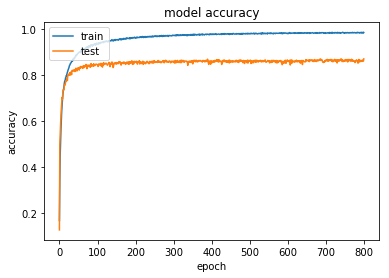

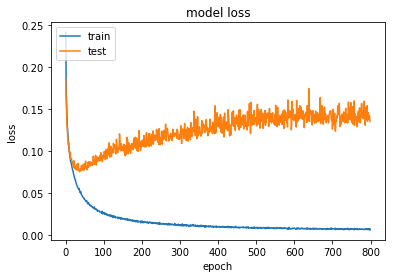

In [78]:
import matplotlib.pyplot as plt
plt.plot(history.history['actual_accuracy'])
plt.plot(history.history['val_actual_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [25]:
model = load_model('test.h5')

In [6]:
h5f.close()

NameError: name 'h5f' is not defined

In [67]:
# evaluate the model
scores = model.evaluate([X_validate, X_other_features_validate], y_validate)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

108736/108961 [============================>.] - ETA: 0s
acc: 96.57%


In [187]:
pos = 0
print(decode_input(X_validate[pos], dictionary))
# predictions = model.predict([X_validate, X_other_features_validate])
predictions2 = model.predict([X_validate[pos:pos+1], X_other_features_validate[pos:pos+1]])
# print(predictions2)
print(np.round(predictions2)[0])
# predictions = np.round(predictions)
print(y_validate[pos])
# accuracy = sum([1 if np.all(y_validate[i] == predictions[i]) else 0 for i in range(X_validate.shape[0])])/float(X_validate.shape[0])
# print(accuracy)


import keras.backend as K

def act_accuracy(y_true, y_pred):
    return K.mean(K.equal(K.mean(K.equal(K.round(y_true), K.round(y_pred)), axis=-1), 1.0))


def mean_pred2(y_true, y_pred):
    return K.mean(K.equal(K.argmax(y_true, axis=-1), K.argmax(y_pred, axis=-1)))
#     return K.mean(K.all(K.equal(y_true, y_pred), axis=-1))
#     return K.equal(K.round(y_true), K.round(y_pred))

print(mean_pred(y_validate[pos], predictions[pos]).eval())
print(mean_pred(np.array([[ 0.,  1.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
                          [ 0.,  1.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]]), 
                np.array([[ 0.,  0.51,  0.,  0.51,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
                          [ 0.,  0.92,  0.,  0.51,  0.,  0.,  0.,  0.,  0.,  0.,  0.]])).eval())
# print(mean_pred(y_validate[pos], predictions[pos]))
# print(mean_pred2(y_validate[pos], predictions[pos]))
print(metrics.categorical_accuracy(y_validate[pos], predictions[pos]))

nerazloènejši
[ 0.  1.  0.  1.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  1.  0.  1.  0.  0.  0.  0.  0.  0.  0.]
1.0
1.0
Elemwise{Cast{float32}}.0


In [ ]:
predictions = model.predict(X[429145:])

In [21]:
decode_position(predictions[0], max_num_vowels)

[1, 0]

In [23]:
def test_accuracy(predictions, y):
    dictionary, max_word, max_num_vowels, content, vowels, accetuated_vowels = create_dict()
    num_of_pred = len(predictions)
    num_of_correct_pred = 0
    for i in range(predictions.shape[0]):
        if decode_position(predictions[i], max_num_vowels) == decode_position(y[i], max_num_vowels):
            num_of_correct_pred += 1

    return (num_of_correct_pred/float(num_of_pred)) * 100


print(test_accuracy(predictions, y[429145:]))

READING CONTENT...
CONTENT READ SUCCESSFULY
CREATING DICTIONARY...
DICTIONARY CREATION SUCCESSFUL!
107287
96.5186835311


In [17]:
predictions.shape

(107287, 121)

In [12]:
print max_num_vowels

11


In [31]:
dictionary, max_word, max_num_vowels, content, vowels, accetuated_vowels = create_dict()
feature_dictionary = create_feature_dictionary(content)
def generate_input_from_word(word, max_word, dictionary):
    x = np.zeros((max_word, len(dictionary)))
    j = 0
    for c in list(word):
        index = 0
        for d in dictionary:
            if c == d:
                x[j, index] = 1
                break
            index += 1
        j += 1
    return x

# model = load_model()
# prediction = predict(model, generate_input_from_word('hidrija'))
# print decode_position(prediction[0])

READING CONTENT...
CONTENT READ SUCCESSFULY
CREATING DICTIONARY...
DICTIONARY CREATION SUCCESSFUL!


In [190]:
%run ../../../prepare_data.py
# generate_X_and_y(dictionary, max_word, max_num_vowels, content, vowels, accetuated_vowels, feature_dictionary)